In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
inf= int(1e4)

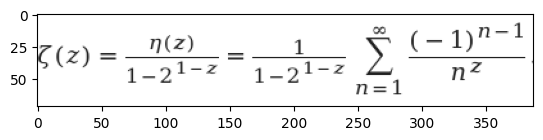

In [3]:
formula=plt.imread('zeta2.png')
plt.imshow(formula)

In [4]:
def zeta(z):
    f= lambda n: (-1)**(n-1) * n**(-z)
    vf= np.vectorize(f)
    arr= vf(np.arange(1,inf,1))
    s= arr.sum()
    s= s* 1/(1- 2**(1-z))
    return s

In [5]:
import pandas as pd
df= pd.DataFrame()
reals= np.arange(0,1,.005)
imags= np.arange(-20, 20, .1)
from itertools import product 
df[['reals','imags']]=list(product(reals, ))

In [7]:
df['complex']= df['reals']+ 1j * df['imags']

In [9]:
df['zeta']= df['complex'].apply(zeta)

In [11]:
df['zeta_abs']=df['zeta'].apply(abs)
df['zeta_angle']= df['zeta'].apply(np.angle)

In [13]:
pivot= pd.pivot_table(df, values='zeta_angle', index='imags', columns='reals')

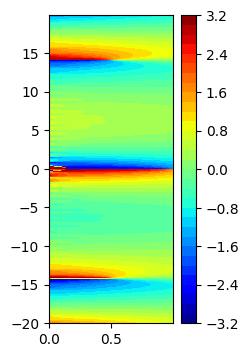

In [17]:
plt.figure(figsize=(2,4))
plt.contourf(pivot.columns, pivot.index, pivot, 40, cmap='jet')
plt.colorbar()